In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
tweet = pd.read_csv('https://raw.githubusercontent.com/AmrutaKoshe/Twitter-US-Airline-Sentiment/main/Tweets.csv')

### View tha data

In [24]:
tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [25]:
tweet.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


### Depicts the number of NaN values in a column

In [26]:
len(tweet) - tweet.count()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

### Depicts % of Nan values in a column

In [27]:
(len(tweet) - tweet.count())/len(tweet)

tweet_id                        0.000000
airline_sentiment               0.000000
airline_sentiment_confidence    0.000000
negativereason                  0.373087
negativereason_confidence       0.281284
airline                         0.000000
airline_sentiment_gold          0.997268
name                            0.000000
negativereason_gold             0.997814
retweet_count                   0.000000
text                            0.000000
tweet_coord                     0.930396
tweet_created                   0.000000
tweet_location                  0.323292
user_timezone                   0.329235
dtype: float64

### Remove features having majority NaN values 

In [28]:
del tweet['airline_sentiment_gold']
del tweet['negativereason_gold']
del tweet['tweet_coord']

In [29]:
tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [30]:
senti_count = tweet['airline_sentiment'].value_counts()

In [31]:
senti_count

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

Text(0.5, 1.0, 'Count of Moods')

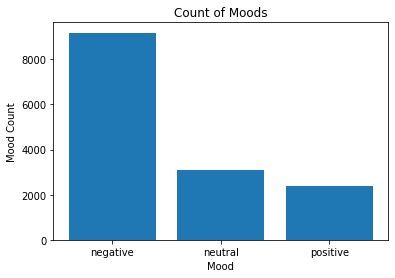

In [32]:
plt.bar(['negative','neutral','positive'], senti_count)
plt.ylabel('Mood Count')
plt.xlabel('Mood')
plt.title('Count of Moods')

In [33]:
airline_count = tweet['airline'].value_counts()

In [34]:
airline_count

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

<BarContainer object of 6 artists>

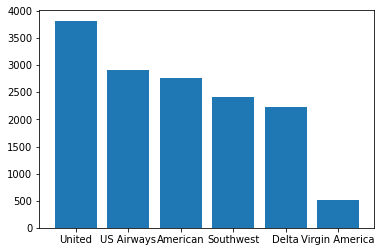

In [35]:
plt.bar(airline_count.keys(),airline_count)

In [36]:
def plot_sub_sentiment(Airline):
  df = tweet[tweet['airline'] == Airline]
  senti = df['airline_sentiment'].value_counts()
  plt.bar(senti.keys(),senti)
  plt.title(Airline)

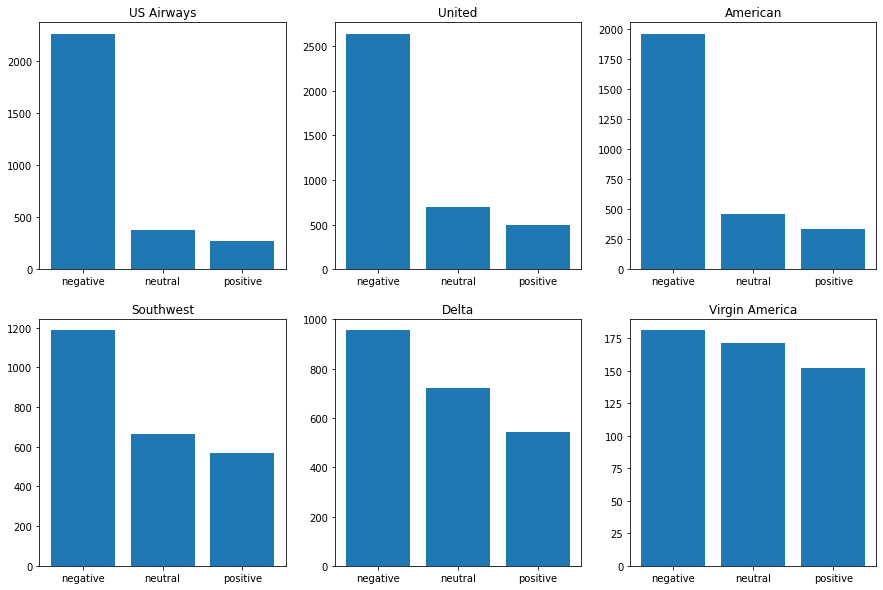

In [37]:
plt.figure(1,figsize=(15, 10))
plt.subplot(231)
plot_sub_sentiment('US Airways')
plt.subplot(232)
plot_sub_sentiment('United')
plt.subplot(233)
plot_sub_sentiment('American')
plt.subplot(234)
plot_sub_sentiment('Southwest')
plt.subplot(235)
plot_sub_sentiment('Delta')
plt.subplot(236)
plot_sub_sentiment('Virgin America')

In [38]:
NR_count = tweet['negativereason'].value_counts()
NR_count

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

Text(0.5, 0, 'reason')

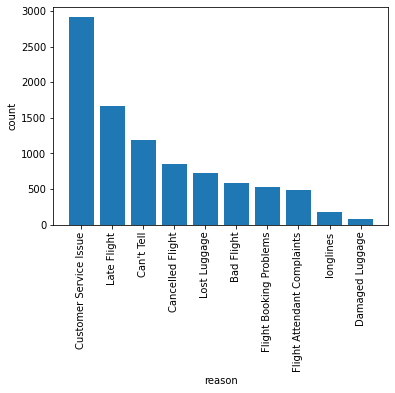

In [39]:
plt.bar(NR_count.keys(),NR_count)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.xlabel('reason')

In [40]:
def plot_sub_reason(Airline):
  df = tweet[tweet['airline'] == Airline]
  reason = df['negativereason'].value_counts()
  plt.bar(reason.keys(),reason)
  plt.xticks(rotation=90)
  plt.title(Airline)

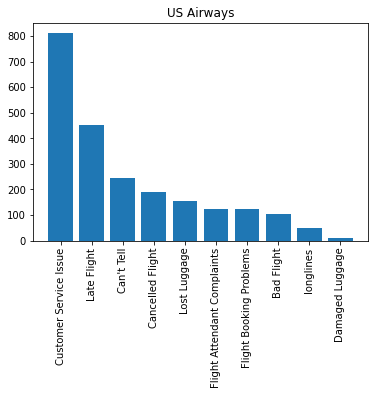

In [41]:
plot_sub_reason('US Airways')

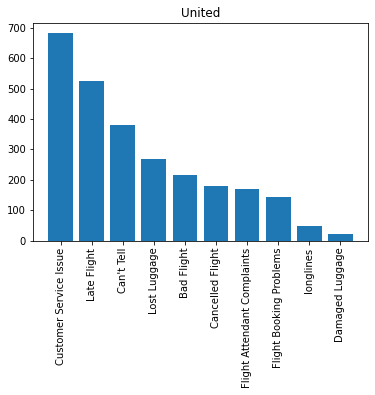

In [42]:
plot_sub_reason('United')

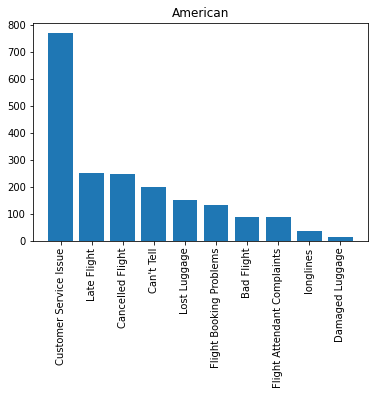

In [43]:
plot_sub_reason('American')

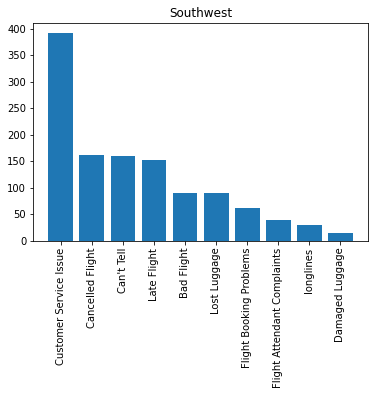

In [44]:
plot_sub_reason('Southwest')

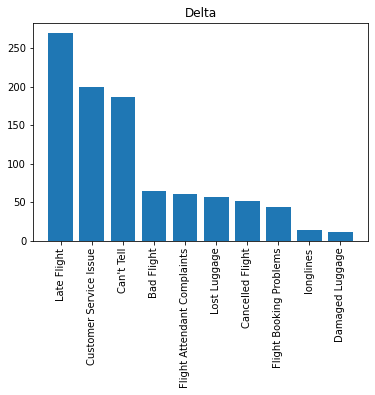

In [45]:
plot_sub_reason('Delta')

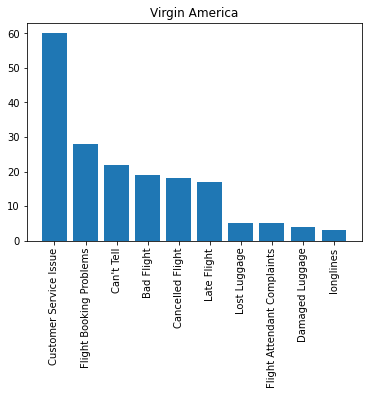

In [46]:
plot_sub_reason('Virgin America')

In [47]:
from wordcloud import WordCloud,STOPWORDS

In [48]:
df = tweet[tweet['airline_sentiment']=='negative']
words = ' '.join(df['text'])
words

'@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse @VirginAmerica and it\'s a really big bad thing about it @VirginAmerica seriously would pay $30 a flight for seats that didn\'t have this playing.\nit\'s really the only bad thing about flying VA @VirginAmerica SFO-PDX schedule is still MIA. @VirginAmerica  I flew from NYC to SFO last week and couldn\'t fully sit in my seat due to two large gentleman on either side of me. HELP! @VirginAmerica why are your first fares in May over three times more than other carriers when all seats are available to select??? @VirginAmerica you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet @VirginAmerica status match program.  I applied and it\'s been three weeks.  Called and emailed with no response. @VirginAmerica What happened 2 ur vegan food options?! At least say on ur site so i know I won\'t be abl

In [49]:
clean_words = ' '.join([word for word in words.split() if "http" not in word and not word.startswith('@') and word!= 'RT'])
clean_words

'it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse and it\'s a really big bad thing about it seriously would pay $30 a flight for seats that didn\'t have this playing. it\'s really the only bad thing about flying VA SFO-PDX schedule is still MIA. I flew from NYC to SFO last week and couldn\'t fully sit in my seat due to two large gentleman on either side of me. HELP! why are your first fares in May over three times more than other carriers when all seats are available to select??? you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet status match program. I applied and it\'s been three weeks. Called and emailed with no response. What happened 2 ur vegan food options?! At least say on ur site so i know I won\'t be able 2 eat anything for next 6 hrs #fail amazing to me that we can\'t get any cold air from the vents. #VX358 #noair #worstflightever #roasted

In [50]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black',width=3000,height=2500).generate(clean_words)

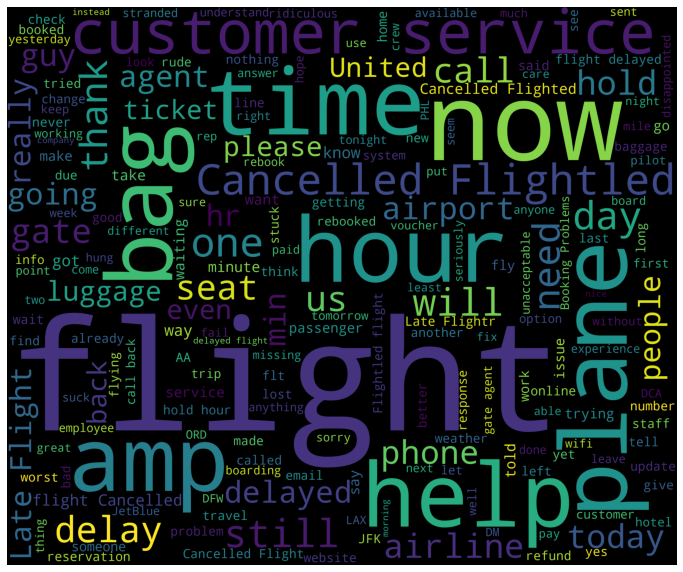

In [51]:
plt.figure(1,figsize=(12, 12))
plt.axis('off')
plt.imshow(wordcloud)

In [52]:
import re
import nltk
from nltk.corpus import stopwords

In [53]:
def tweet_to_words(raw_tweet): 
    words = re.sub("[^a-zA-Z]", " ",raw_tweet).lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

In [56]:
tweet_to_words(clean_words)

'really aggressive blast obnoxious entertainment guests faces amp little recourse really big bad thing seriously would pay flight seats playing really bad thing flying va sfo pdx schedule still mia flew nyc sfo last week fully sit seat due two large gentleman either side help first fares may three times carriers seats available select guys messed seating reserved seating friends guys gave seat away want free internet status match program applied three weeks called emailed response happened ur vegan food options least say ur site know able eat anything next hrs fail amazing get cold air vents vx noair worstflightever roasted sfotobos hi bked cool birthday trip add elevate cause entered middle name flight booking problems help left expensive headphones flight iad lax today seat one answering l amp f number lax awaiting return phone call would prefer use online self service option chat support working site hey first time flyer next week excited hard time getting flights added elevate acco

In [59]:
def clean_tweet_length(raw_tweet):
    words = re.sub("[^a-zA-Z]", " ",raw_tweet).lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words)) 

In [60]:
clean_tweet_length(clean_words)

88573

In [61]:
tweet['sentiment'] = tweet['airline_sentiment'].apply(lambda x: 0 if x =='negative' else 1)

<BarContainer object of 2 artists>

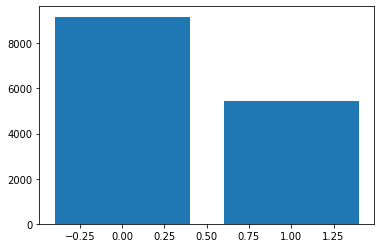

In [64]:
se = tweet['sentiment'].value_counts()
plt.bar(se.keys(),se)

In [65]:
tweet['clean_text'] = tweet['text'].apply(lambda x: tweet_to_words(x))

In [69]:
tweet['tweet_length']=tweet['text'].apply(lambda x: clean_tweet_length(x))

In [70]:
from sklearn.model_selection import train_test_split

In [72]:
train,test = train_test_split(tweet,test_size=0.2,random_state=42)

In [74]:
train_clean_text=[]
for tweet in train['clean_text']:
    train_clean_text.append(tweet)
test_clean_text=[]
for tweet in test['clean_text']:
    test_clean_text.append(tweet)
train_clean_text

['united offering us rooms people fail',
 'jetblue jfk nyc staff amazing lax jetblue sending email details disappointing experience jetbluecheeps',
 'jetblue well last update right direction least keep fingers crossed',
 'americanair flight still sitting dfw waiting baggage loaded',
 'southwestair companion pass broken today purchase error invalid loyalty member account status sw vyil xklrog fs j',
 'united pushing hours hold priceless http co ths ldy',
 'americanair trying reach customer service two days received zero response never traveling aa',
 'united jx today would great honeymoon delay put damper iy',
 'americanair calling straight days one picks sure storms also customers holler',
 'usairways going phlairport sitting gate minutes',
 'southwestair delay understandable look time flight boarding time weird',
 'jetblue cool gate turns flight fll jax delayed yet app says time good start',
 'united saying truth even email',
 'usairways americanair stranded north carolina trying figu

In [78]:
pd.set_option("display.max_colwidth", -1)
train[['text','sentiment']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,text,sentiment
750,@united you are offering us 8 rooms for 32 people #FAIL,0
6875,@JetBlue JFK NYC staff is amazing. The #lax JetBlue... Sending an email with details but it was a disappointing experience @JetBlueCheeps,0
7598,"@JetBlue well, the last update was in the right direction, at least! I'll keep my fingers crossed.",1
14124,@AmericanAir flight 3056 still sitting at DFW waiting for baggage to be loaded,0
6187,@southwestair is your companion pass broken today? \npurchase.error.INVALID_LOYALTY_MEMBER_ACCOUNT_STATUS (SW900001-vyiL1XKlROG24fS-918j_A),1
...,...,...
5191,@SouthwestAir replacing @vitaminwater with beer! Bravo!👏👏 Cheers! 🍻🍻 @Leinenkugels @DosEquis @FatTire,1
13418,@AmericanAir at LAX and your service reps just hand out the 800 number to call. So that's not helpful.,0
5390,@SouthwestAir Been on hold for over an hour - any chance someone can help me on here?,0
860,@united we would...how do I contact you to discuss? A few poor experiences with customer service but would give it a shot!,0


In [81]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_text)
test_features=v.transform(test_clean_text)